In [23]:
''' # This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session '''

' # This Python 3 environment comes with many helpful analytics libraries installed\n# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python\n# For example, here\'s several helpful packages to load\n\nimport numpy as np # linear algebra\nimport pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)\n\n# Input data files are available in the read-only "../input/" directory\n# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory\n\nimport os\nfor dirname, _, filenames in os.walk(\'/kaggle/input\'):\n    for filename in filenames:\n        print(os.path.join(dirname, filename))\n\n# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" \n# You can also write temporary files to /kaggle/temp/, but they won\'t be saved outside of the current session '

In [24]:
import pandas as pd
import numpy as np
df=pd.read_csv('final dataset.csv')
df.head()

,Job_Role,avg_salary,primary_city,is_multi_city,is_remote,city_group,skills,num_skills,experience,has_experience,skill_set
0,Senior Data Scientist,18.9,Bangalore/Bengaluru,1,0,metro,"machine learning, python, r, scala",4,4.5,1,"{'python', 'scala', 'r', 'machine learning'}"
1,Senior Data Scientist,16.7,Bangalore/Bengaluru,1,0,metro,"machine learning, python, r, scala",4,4.5,1,"{'python', 'scala', 'r', 'machine learning'}"
2,Senior Data Scientist,17.9,Bangalore/Bengaluru,1,0,metro,"machine learning, python, r, scala",4,4.5,1,"{'python', 'scala', 'r', 'machine learning'}"
3,Senior Data Scientist,25.6,Bangalore/Bengaluru,1,0,metro,"machine learning, python, r, scala",4,4.5,1,"{'python', 'scala', 'r', 'machine learning'}"
4,Senior Data Scientist,28.0,Bangalore/Bengaluru,1,0,metro,"machine learning, python, r, scala",4,4.5,1,"{'python', 'scala', 'r', 'machine learning'}"


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 385257 entries, 0 to 385256
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Job_Role        385257 non-null  object 
 1   avg_salary      385257 non-null  float64
 2   primary_city    385257 non-null  object 
 3   is_multi_city   385257 non-null  int64  
 4   is_remote       385257 non-null  int64  
 5   city_group      385257 non-null  object 
 6   skills          380388 non-null  object 
 7   num_skills      385257 non-null  int64  
 8   experience      385257 non-null  float64
 9   has_experience  385257 non-null  int64  
 10  skill_set       385257 non-null  object 
dtypes: float64(2), int64(4), object(5)
memory usage: 32.3+ MB


In [26]:
df.describe()

,avg_salary,is_multi_city,is_remote,num_skills,experience,has_experience
count,385257.000000,385257.000000,385257.000000,385257.000000,385257.000000,385257.000000
mean,11.979045,0.157277,0.014697,3.384258,5.210278,0.999512
std,6.437660,0.364062,0.120336,1.701759,2.325577,0.022085
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.300000,0.000000,0.000000,2.000000,3.500000,1.000000
50%,10.800000,0.000000,0.000000,3.000000,5.000000,1.000000
75%,15.300000,0.000000,0.000000,5.000000,6.500000,1.000000
max,32.100000,1.000000,1.000000,9.000000,16.500000,1.000000


In [27]:
pd.set_option('display.max_rows', None)

In [28]:
city_mapping = {
    # Delhi region
    'Delhi': 'New Delhi',
    'Delhi / NCR': 'New Delhi',

    # Hyderabad
    'Hyderabad/Secunderabad': 'Hyderabad',

    # Kochi
    'Kochi/Cochin': 'Kochi',

    # Panaji
    'Panaji/Panjim': 'Panaji',
    'Panjim': 'Panaji',

    # Thiruvananthapuram
    'Trivandrum': 'Thiruvananthapuram',
    'Trivandrum/Thiruvananthapuram': 'Thiruvananthapuram',

    # Mangalore
    'Mangaluru/Mangalore': 'Mangalore',

    # Kozhikode
    'Calicut/Kozhikode': 'Kozhikode',

    # Mohali
    'Mohali/SAS Nagar': 'Mohali',

    # Bengaluru (safety)
    'Bangalore': 'Bengaluru',
    'Bangalore/Bengaluru': 'Bengaluru',

    # Gurugram (already mostly fixed)
    'Gurgaon': 'Gurugram',
    'Gurgaon/Gurugram': 'Gurugram',

    # States wrongly inside city column
    'karnataka': 'Bengaluru',
    'punjab': 'Chandigarh',
    'Gujarat': 'Ahmedabad',
    'Uttar Pradesh': 'Lucknow'
}
df['primary_city'] = df['primary_city'].replace(city_mapping)


# Exploratory Data Analysis

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

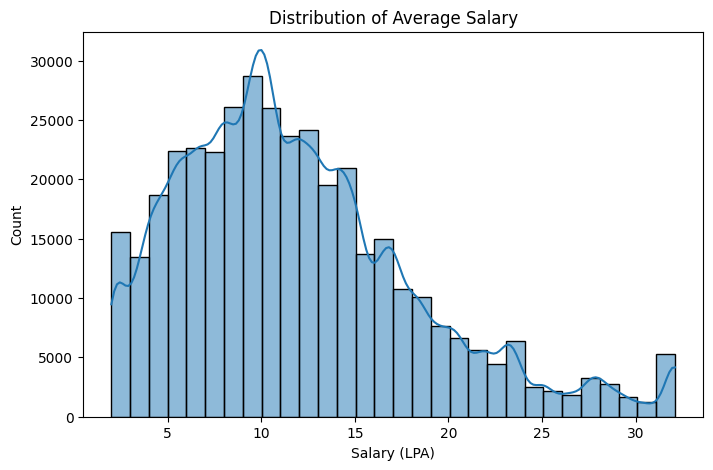

In [31]:
plt.figure(figsize=(8,5))
sns.histplot(df['avg_salary'], bins=30, kde=True)
plt.title('Distribution of Average Salary')
plt.xlabel('Salary (LPA)')
plt.show()


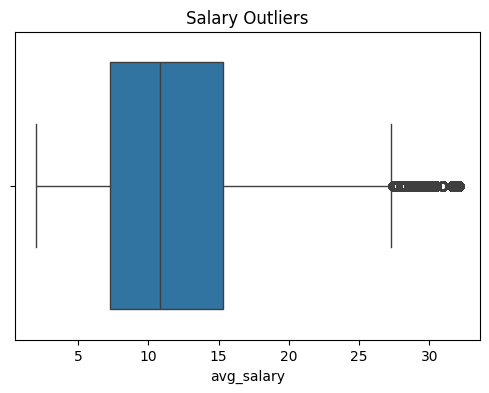

In [32]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['avg_salary'])
plt.title('Salary Outliers')
plt.show()


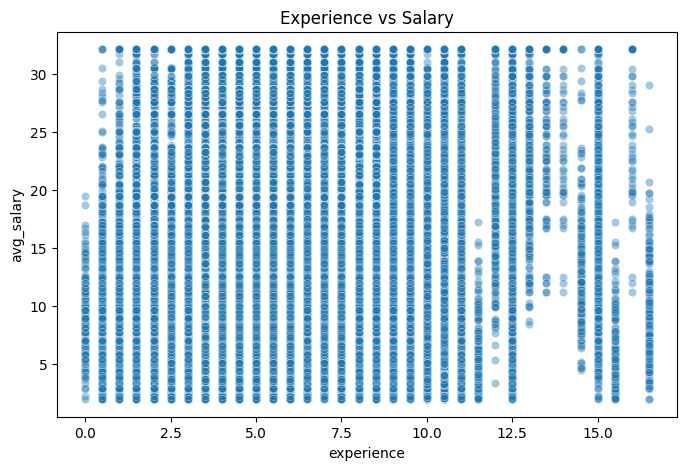

In [33]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='experience', y='avg_salary', data=df, alpha=0.4)
plt.title('Experience vs Salary')
plt.show()


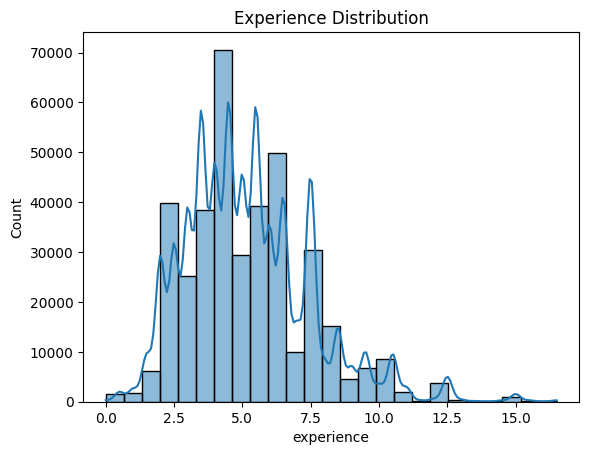

In [34]:
sns.histplot(df['experience'], bins=25, kde=True)
plt.title('Experience Distribution')
plt.show()


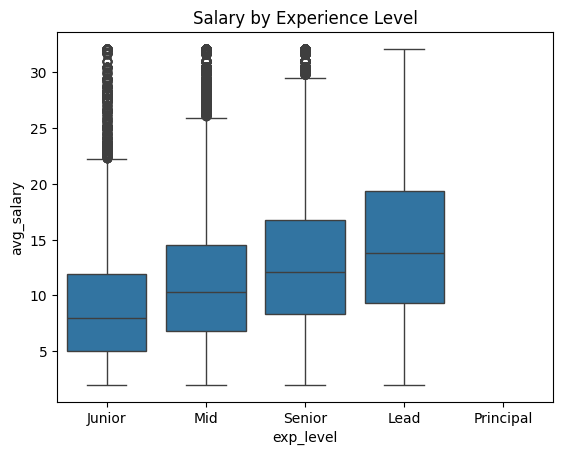

In [35]:
df['exp_level'] = pd.cut(
    df['experience'], 
    bins=[0,2,5,10,20,50],
    labels=['Junior','Mid','Senior','Lead','Principal']
)

sns.boxplot(x='exp_level', y='avg_salary', data=df)
plt.title('Salary by Experience Level')
plt.show()


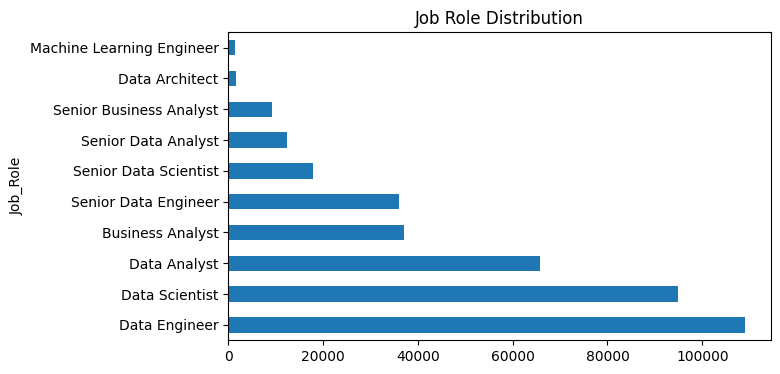

In [36]:
df['Job_Role'].value_counts().plot(kind='barh', figsize=(7,4))
plt.title('Job Role Distribution')
plt.show()


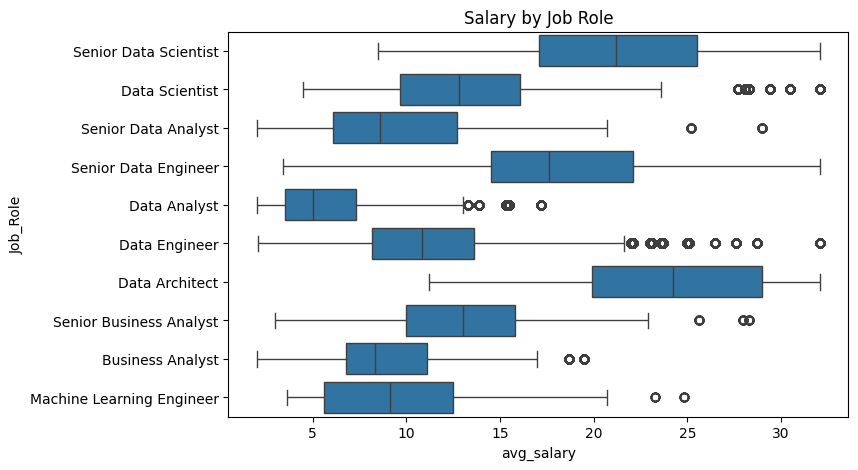

In [37]:
plt.figure(figsize=(8,5))
sns.boxplot(y='Job_Role', x='avg_salary', data=df)
plt.title('Salary by Job Role')
plt.show()


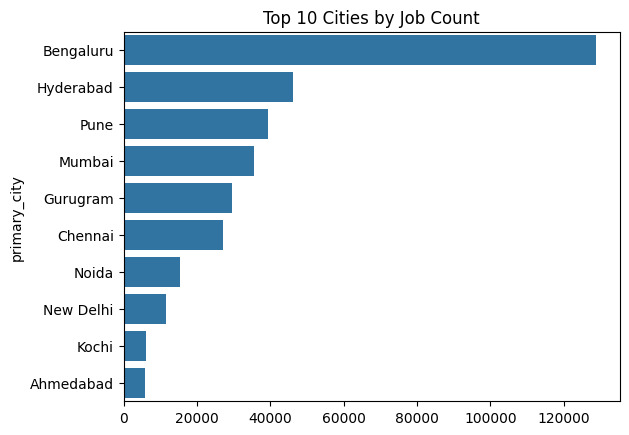

In [38]:
top_cities = df['primary_city'].value_counts().head(10)

sns.barplot(x=top_cities.values, y=top_cities.index)
plt.title('Top 10 Cities by Job Count')
plt.show()


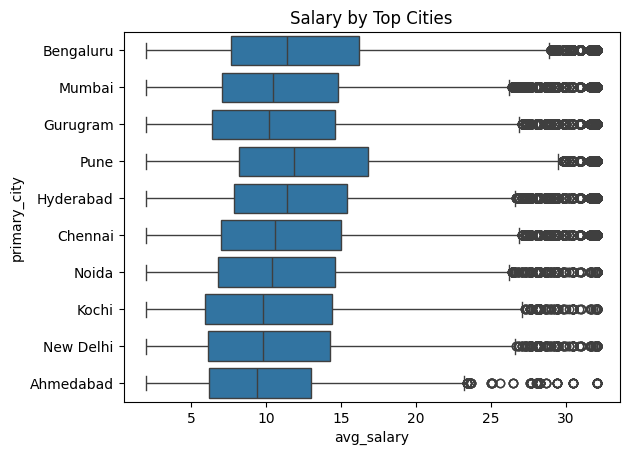

In [39]:
top_city_names = top_cities.index
sns.boxplot(
    y='primary_city', 
    x='avg_salary',
    data=df[df['primary_city'].isin(top_city_names)]
)
plt.title('Salary by Top Cities')
plt.show()


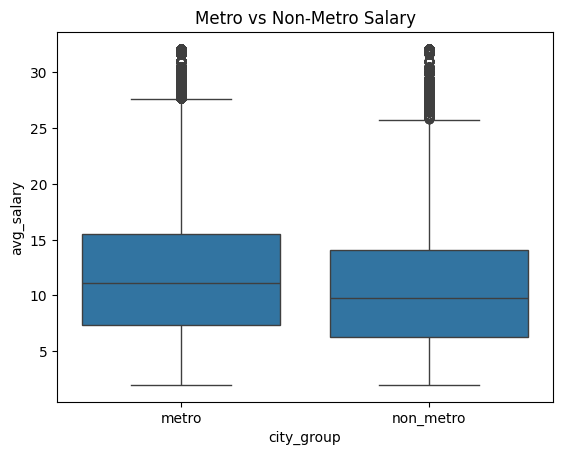

In [40]:
sns.boxplot(x='city_group', y='avg_salary', data=df)
plt.title('Metro vs Non-Metro Salary')
plt.show()


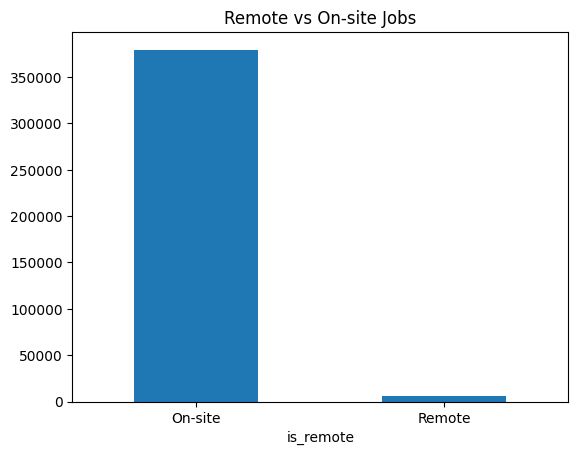

In [41]:
df['is_remote'].value_counts().plot(kind='bar')
plt.xticks([0,1], ['On-site','Remote'], rotation=0)
plt.title('Remote vs On-site Jobs')
plt.show()


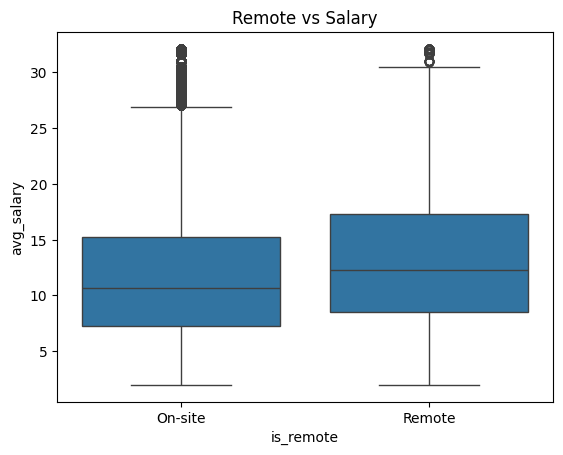

In [42]:
sns.boxplot(x='is_remote', y='avg_salary', data=df)
plt.xticks([0,1], ['On-site','Remote'])
plt.title('Remote vs Salary')
plt.show()


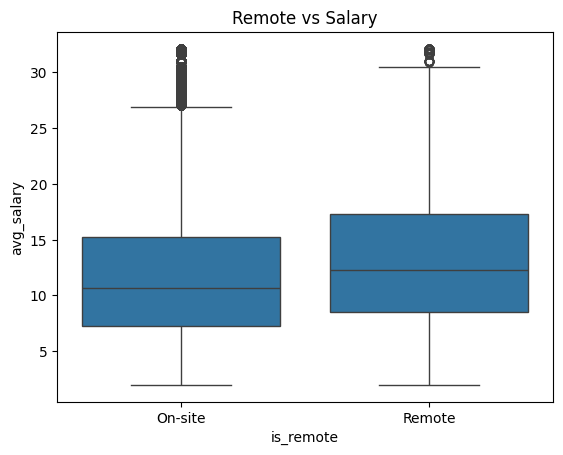

In [43]:
sns.boxplot(x='is_remote', y='avg_salary', data=df)
plt.xticks([0,1], ['On-site','Remote'])
plt.title('Remote vs Salary')
plt.show()


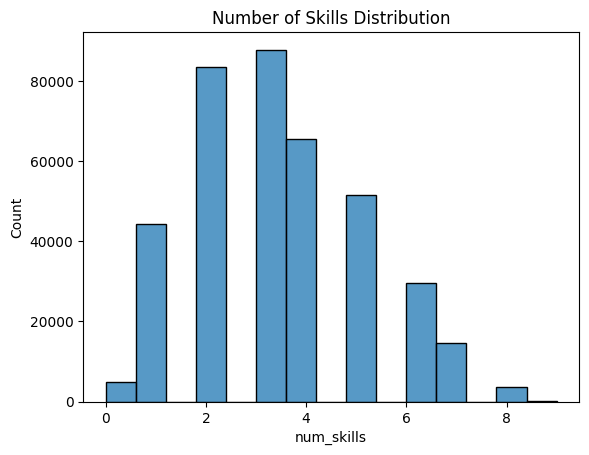

In [44]:
sns.histplot(df['num_skills'], bins=15)
plt.title('Number of Skills Distribution')
plt.show()


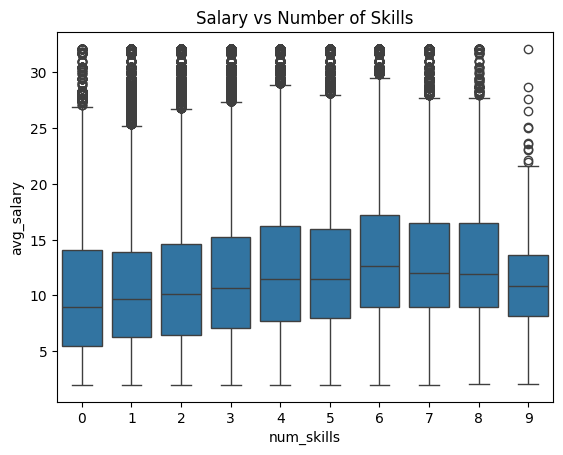

In [45]:
sns.boxplot(x='num_skills', y='avg_salary', data=df)
plt.title('Salary vs Number of Skills')
plt.show()


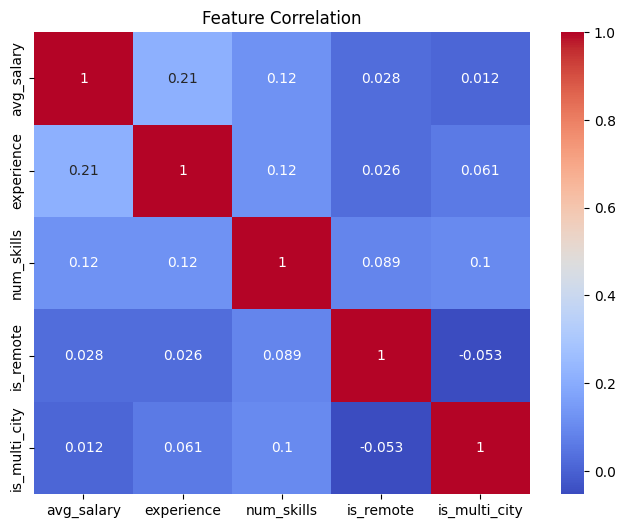

In [46]:
plt.figure(figsize=(8,6))
sns.heatmap(
    df[['avg_salary','experience','num_skills','is_remote','is_multi_city']]
    .corr(),
    annot=True,
    cmap='coolwarm'
)
plt.title('Feature Correlation')
plt.show()


C:\Users\admin\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


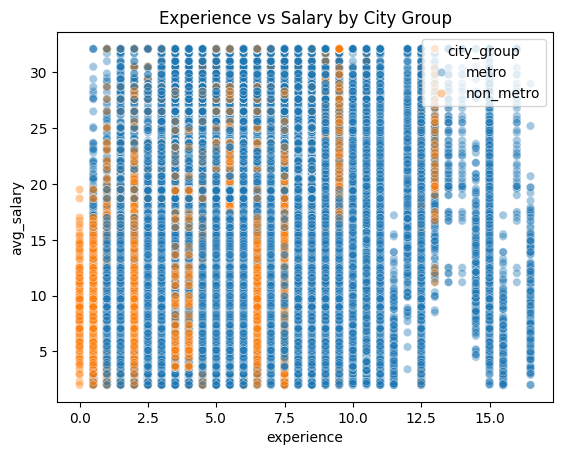

In [47]:
sns.scatterplot(
    x='experience',
    y='avg_salary',
    hue='city_group',
    data=df,
    alpha=0.4
)
plt.title('Experience vs Salary by City Group')
plt.show()


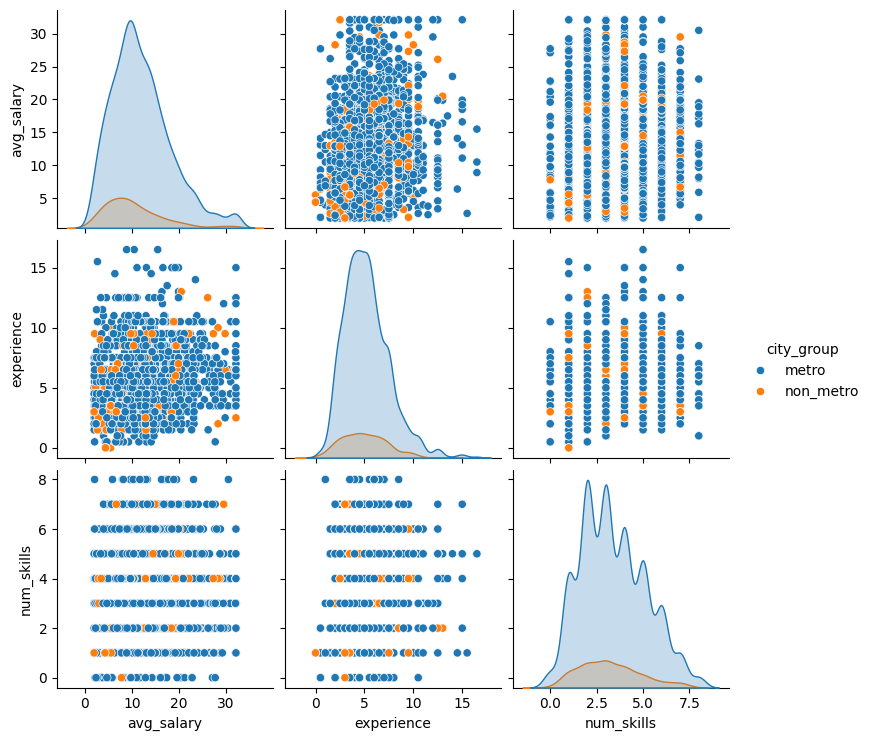

In [48]:
sns.pairplot(
    df.sample(3000),
    vars=['avg_salary','experience','num_skills'],
    hue='city_group'
)


# Extracting features

In [50]:
exp_map = {
    'Junior': 0,
    'Mid': 1,
    'Senior': 2,
    'Lead': 3,
    'Principal': 4
}

df['exp_level_num'] = df['exp_level'].map(exp_map)

In [51]:
df['skill_density'] = df['num_skills'] / (df['experience'] + 1)


In [52]:
df['exp_x_skills'] = df['experience'] * df['num_skills']

role_salary_mean = df.groupby('Job_Role')['avg_salary'].mean()
df['job_role_encoded'] = df['Job_Role'].map(role_salary_mean)

In [53]:
import ast

def to_set(x):
    if isinstance(x, set):
        return x
    if isinstance(x, str):
        try:
            return set(ast.literal_eval(x))
        except:
            return set()
    return set()

df['skill_set'] = df['skill_set'].apply(to_set)

skill_groups = {
    'prog_langs': {'python','r','scala','java','javascript','c++','c#'},
    'ml_skills': {'machine learning','deep learning','nlp','computer vision',
                  'scikit-learn','tensorflow','pytorch','keras','xgboost'},
    'data_eng': {'spark','hadoop','kafka','airflow','etl','elt','databricks','pipeline'},
    'cloud': {'aws','azure','gcp','docker','kubernetes','terraform',
              'ansible','jenkins','ci/cd','ec2','s3','lambda'},
    'databases': {'sql','mysql','postgresql','mongodb','cassandra',
                  'nosql','redis','oracle','snowflake','bigquery'},
    'bi_tools': {'tableau','powerbi','qlikview','excel','ssrs','ssis','looker'},
    'soft_skills': {'management','leadership','agile','scrum',
                    'stakeholder','communication','project'}
}

for group, group_skills in skill_groups.items():
    df[f'num_{group}'] = df['skill_set'].apply(
        lambda s: sum(skill in s for skill in group_skills)
    )


In [54]:
top_skills = ['python','machine learning','deep learning','aws','spark','sql']

for skill in top_skills:
    df[f'skill_{skill.replace(" ","_")}'] = df['skill_set'].apply(
        lambda x: int(skill in x)
    )


In [55]:
df['exp_level_num'].isna().sum()


188

In [56]:
df.loc[df['exp_level_num'].isna(), 'exp_level'].value_counts()


exp_level
Junior       0
Mid          0
Senior       0
Lead         0
Principal    0
Name: count, dtype: int64

In [57]:
df['exp_level'] = df['exp_level'].fillna('Mid')


In [58]:
df['exp_level'].isna().sum()


0

In [59]:
exp_map = {
    'Junior': 0,
    'Mid': 1,
    'Senior': 2,
    'Lead': 3,
    'Principal': 4
}

df['exp_level_num'] = df['exp_level'].map(exp_map).astype('Int64')


# Model Training Process using Pipeline

In [61]:
'''for predicton we are not using these to train model 

Job_Role
primary_city
city_group
skills
skill_set
exp_level

'''

model_features = [
    # Experience
    'experience',
    'has_experience',
    'exp_level_num',

    # Skills (derived)
    'num_skills',
    'skill_density',
    'exp_x_skills',

    # Skill groups
    'num_prog_langs',
    'num_ml_skills',
    'num_data_eng',
    'num_cloud',
    'num_databases',
    'num_bi_tools',
    'num_soft_skills',

    # Key skills (binary)
    'skill_python',
    'skill_machine_learning',
    'skill_deep_learning',
    'skill_aws',
    'skill_spark',
    'skill_sql',

    # Job & location
    'is_remote',
    'is_multi_city',
    'job_role_encoded'
]



scale_cols = [
    'experience',
    'skill_density',
    'exp_x_skills',
    'job_role_encoded'
]

no_scale_cols = [
    'has_experience', 'exp_level_num',
    'num_skills',
    'num_prog_langs', 'num_ml_skills', 'num_data_eng',
    'num_cloud', 'num_databases', 'num_bi_tools', 'num_soft_skills',
    'skill_python', 'skill_machine_learning', 'skill_deep_learning',
    'skill_aws', 'skill_spark', 'skill_sql',
    'is_remote', 'is_multi_city'
]


X = df[model_features]
y = df['avg_salary']


# Random Forest model without job role and city

In [63]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

preprocessor = ColumnTransformer(
    transformers=[
        ('scaled', StandardScaler(), scale_cols),
        ('pass', 'passthrough', no_scale_cols)
    ]
)


In [64]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)


In [65]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(
        n_estimators=100,
        max_depth=10,
        min_samples_split=10,
        random_state=42,
        n_jobs=-1
    ))
])


In [66]:
pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('scaled', StandardScaler(),
                                                  ['experience',
                                                   'skill_density',
                                                   'exp_x_skills',
                                                   'job_role_encoded']),
                                                 ('pass', 'passthrough',
                                                  ['has_experience',
                                                   'exp_level_num',
                                                   'num_skills',
                                                   'num_prog_langs',
                                                   'num_ml_skills',
                                                   'num_data_eng', 'num_cloud',
                                                   'num_databases',
                                                   'num_bi_tools',
                                                   'num_soft_skills',
                                                   'skill_python',
                                                   'skill_machine_learning',
                                                   'skill_deep_learning',
                                                   'skill_aws', 'skill_spark',
                                                   'skill_sql', 'is_remote',
                                                   'is_multi_city'])])),
                ('model',
                 RandomForestRegressor(max_depth=10, min_samples_split=10,
                                       n_jobs=-1, random_state=42))])

In [67]:
from sklearn.metrics import mean_absolute_error, r2_score , mean_squared_error
import numpy as np

# Training predictions
y_train_pred = pipeline.predict(X_train)

# Test predictions
y_test_pred = pipeline.predict(X_test)

print("----- TRAIN -----")
print("MAE:", mean_absolute_error(y_train, y_train_pred))
print("R2 :", r2_score(y_train, y_train_pred))

print("\n----- TEST -----")
print("MAE:", mean_absolute_error(y_test, y_test_pred))
print("R2 :", r2_score(y_test, y_test_pred))

----- TRAIN -----
MAE: 3.697402906539684
R2 : 0.41615096958825004

----- TEST -----
MAE: 3.7142286459735914
R2 : 0.4101908050147921


# Linear regression model without job role and city

In [69]:
from sklearn.linear_model import LinearRegression 
preprocessor_lr = ColumnTransformer(
    transformers=[
        ('scaled', StandardScaler(), scale_cols),
        ('passthrough', 'passthrough', no_scale_cols)
    ]
)



lr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor_lr),
    ('model', LinearRegression())
])


lr_pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('scaled', StandardScaler(),
                                                  ['experience',
                                                   'skill_density',
                                                   'exp_x_skills',
                                                   'job_role_encoded']),
                                                 ('passthrough', 'passthrough',
                                                  ['has_experience',
                                                   'exp_level_num',
                                                   'num_skills',
                                                   'num_prog_langs',
                                                   'num_ml_skills',
                                                   'num_data_eng', 'num_cloud',
                                                   'num_databases',
                                                   'num_bi_tools',
                                                   'num_soft_skills',
                                                   'skill_python',
                                                   'skill_machine_learning',
                                                   'skill_deep_learning',
                                                   'skill_aws', 'skill_spark',
                                                   'skill_sql', 'is_remote',
                                                   'is_multi_city'])])),
                ('model', LinearRegression())])

In [70]:
y_pred_train_lr=lr_pipeline.predict(X_train)

y_pred_test_lr=lr_pipeline.predict(X_test)

print("----- TRAIN -----")
print("MAE:", mean_absolute_error(y_train, y_pred_train_lr))
print("R2 :", r2_score(y_train, y_pred_train_lr))

print("\n----- TEST -----")
print("MAE:", mean_absolute_error(y_test, y_pred_test_lr))
print("R2 :", r2_score(y_test, y_pred_test_lr))

----- TRAIN -----
MAE: 3.6983322135309216
R2 : 0.4158156503779338

----- TEST -----
MAE: 3.7077162504667087
R2 : 0.4123289740657201


# Linear regression model with job role and city

In [72]:
model_features = [
    # Experience
    'experience',
    'has_experience',
    'exp_level_num',

    # Skills (derived)
    'num_skills',
    'skill_density',
    'exp_x_skills',

    # Skill groups
    'num_prog_langs',
    'num_ml_skills',
    'num_data_eng',
    'num_cloud',
    'num_databases',
    'num_bi_tools',
    'num_soft_skills',

    # Key skills (binary)
    'skill_python',
    'skill_machine_learning',
    'skill_deep_learning',
    'skill_aws',
    'skill_spark',
    'skill_sql',

    # Job & location
    'is_remote',
    'is_multi_city',
    'job_role_encoded',

    #categorical features
    'Job_Role',
    'primary_city'
]



scale_cols = [
    'experience',
    'skill_density',
    'exp_x_skills',
    'job_role_encoded'
]

no_scale_cols = [
    'has_experience', 'exp_level_num',
    'num_skills',
    'num_prog_langs', 'num_ml_skills', 'num_data_eng',
    'num_cloud', 'num_databases', 'num_bi_tools', 'num_soft_skills',
    'skill_python', 'skill_machine_learning', 'skill_deep_learning',
    'skill_aws', 'skill_spark', 'skill_sql',
    'is_remote', 'is_multi_city'
]


categorical_features = [
    'Job_Role',
    'primary_city'
]


X = df[model_features]
y = df['avg_salary']


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)



In [73]:
from sklearn.preprocessing import OneHotEncoder

In [74]:
preprocessor = ColumnTransformer(
    transformers=[
        ('scaled', StandardScaler(), scale_cols),
        ('cat', OneHotEncoder(
            handle_unknown='ignore',
            drop=None,
            sparse_output=False
        ), categorical_features),
        ('pass', 'passthrough', no_scale_cols)
    ]
)

In [75]:
lr1_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])


lr1_pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('scaled', StandardScaler(),
                                                  ['experience',
                                                   'skill_density',
                                                   'exp_x_skills',
                                                   'job_role_encoded']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Job_Role', 'primary_city']),
                                                 ('pass', 'passthrough',
                                                  ['has_experience',
                                                   'exp_level_num',
                                                   'num_skills',
                                                   'num_prog_langs',
                                                   'num_ml_skills',
                                                   'num_data_eng', 'num_cloud',
                                                   'num_databases',
                                                   'num_bi_tools',
                                                   'num_soft_skills',
                                                   'skill_python',
                                                   'skill_machine_learning',
                                                   'skill_deep_learning',
                                                   'skill_aws', 'skill_spark',
                                                   'skill_sql', 'is_remote',
                                                   'is_multi_city'])])),
                ('model', LinearRegression())])

In [76]:
y_pred_train_lr1=lr1_pipeline.predict(X_train)

y_pred_test_lr1=lr1_pipeline.predict(X_test)

print("----- TRAIN -----")
print("MAE:", mean_absolute_error(y_train, y_pred_train_lr1))
print("R2 :", r2_score(y_train, y_pred_train_lr1))

print("\n----- TEST -----")
print("MAE:", mean_absolute_error(y_test, y_pred_test_lr1))
print("R2 :", r2_score(y_test, y_pred_test_lr1))

----- TRAIN -----
MAE: 3.696348597192999
R2 : 0.4153867842549326

----- TEST -----
MAE: 3.705351853604737
R2 : 0.41446885128014677


# Random forest model with job role and city

In [78]:
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(
        n_estimators=100,
        max_depth=10,
        min_samples_split=10,
        random_state=42,
        n_jobs=-1
    ))
])

rf_pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('scaled', StandardScaler(),
                                                  ['experience',
                                                   'skill_density',
                                                   'exp_x_skills',
                                                   'job_role_encoded']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Job_Role', 'primary_city']),
                                                 ('pass', 'passthrough',
                                                  ['has_experience',
                                                   'exp_level_num',
                                                   'num_skills',
                                                   'num_prog_langs',
                                                   'num_ml_skills',
                                                   'num_data_eng', 'num_cloud',
                                                   'num_databases',
                                                   'num_bi_tools',
                                                   'num_soft_skills',
                                                   'skill_python',
                                                   'skill_machine_learning',
                                                   'skill_deep_learning',
                                                   'skill_aws', 'skill_spark',
                                                   'skill_sql', 'is_remote',
                                                   'is_multi_city'])])),
                ('model',
                 RandomForestRegressor(max_depth=10, min_samples_split=10,
                                       n_jobs=-1, random_state=42))])

In [79]:
y_pred_train_rf=rf_pipeline.predict(X_train)

y_pred_test_rf=rf_pipeline.predict(X_test)

print("----- TRAIN -----")
print("MAE:", mean_absolute_error(y_train, y_pred_train_rf))
print("R2 :", r2_score(y_train, y_pred_train_rf))

print("\n----- TEST -----")
print("MAE:", mean_absolute_error(y_test, y_pred_test_rf))
print("R2 :", r2_score(y_test, y_pred_test_rf))

----- TRAIN -----
MAE: 3.694592719831853
R2 : 0.4159698413887757

----- TEST -----
MAE: 3.711490845923934
R2 : 0.41263052169134906


# XG Boost model

In [81]:
city_salary_mean = df.groupby('primary_city')['avg_salary'].mean()
global_mean = df['avg_salary'].mean()

df['city_salary_index'] = (
    df['primary_city'].map(city_salary_mean) / global_mean
).fillna(1.0)



In [82]:
df['is_senior_role'] = df['Job_Role'].str.contains('Senior', case=False).astype(int)

df['is_cloud_heavy'] = (df['num_cloud'] >= 2).astype(int)


df['is_ml_heavy'] = (df['num_ml_skills'] >= 2).astype(int)


df['exp_bucket'] = pd.cut(
    df['experience'],
    bins=[0,2,5,8,12,50],
    labels=[0,1,2,3,4],
    include_lowest=True
)

df['exp_bucket'] = df['exp_bucket'].cat.add_categories([-1]).fillna(-1).astype(int)




In [83]:
model_features = [
    # Experience
    'experience',
    'has_experience',
    'exp_level_num',

    'is_senior_role',
    'is_cloud_heavy',
    'is_ml_heavy',
    'exp_bucket',
    
    # Skills (derived)
    'num_skills',
    'exp_x_skills',

    # Skill groups
    'num_prog_langs',
    'num_ml_skills',
    'num_data_eng',
    'num_cloud',
    'num_databases',
    'num_bi_tools',
    'num_soft_skills',

    # Key skills (binary)
    'skill_python',
    'skill_machine_learning',
    'skill_deep_learning',
    'skill_aws',
    'skill_spark',
    'skill_sql',

    # Job & location
    'is_remote',
    'is_multi_city',
    'job_role_encoded',

    # categorical
    'Job_Role',

    # city feature
    'city_salary_index'
]



scale_cols = [
    'experience',
    'exp_x_skills',
    
]

no_scale_cols = [
    'has_experience', 'exp_level_num',
    'num_skills',
    'num_prog_langs', 'num_ml_skills', 'num_data_eng',
    'num_cloud', 'num_databases', 'num_bi_tools', 'num_soft_skills',
    'skill_python', 'skill_machine_learning', 'skill_deep_learning',
    'skill_aws', 'skill_spark', 'skill_sql',
    'is_remote', 'is_multi_city' , 'is_senior_role' , 'is_cloud_heavy' , 'is_ml_heavy' , 'exp_bucket'
]


categorical_features = ['Job_Role']



X = df[model_features]
y = df['avg_salary']



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [84]:
from xgboost import XGBRegressor
import numpy as np

In [85]:
preprocessor = ColumnTransformer(
    transformers=[
        # Scale continuous features
        ('scale', StandardScaler(), scale_cols),

        # Pass binary / count features as-is
        ('no_scale', 'passthrough', no_scale_cols),

        # Encode categorical job role
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False),
         categorical_features)
    ],
    remainder='drop'
)


In [86]:
xgb_model = XGBRegressor(
    n_estimators=300,
    learning_rate=0.03,
    max_depth=9,
    min_child_weight=3,
    subsample=0.85,
    colsample_bytree=0.85,
    objective='reg:squarederror',
    random_state=42,
    n_jobs=-1
)


In [87]:
xgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', xgb_model)
])


In [88]:
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

xgb_pipeline.fit(X_train, y_train_log)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('scale', StandardScaler(),
                                                  ['experience',
                                                   'exp_x_skills']),
                                                 ('no_scale', 'passthrough',
                                                  ['has_experience',
                                                   'exp_level_num',
                                                   'num_skills',
                                                   'num_prog_langs',
                                                   'num_ml_skills',
                                                   'num_data_eng', 'num_cloud',
                                                   'num_databases',
                                                   'num_bi_tools',
                                                   'num_soft_skills',
                                                   'skill_python',
                                                   'skill_machine_learning',
                                                   'skill_...
                              feature_types=None, feature_weights=None,
                              gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.03,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=9, max_leaves=None, min_child_weight=3,
                              missing=nan, monotone_constraints=None,
                              multi_strategy=None, n_estimators=300, n_jobs=-1,
                              num_parallel_tree=None, ...))])

In [89]:
# -----------------------
# TRAIN PREDICTIONS
# -----------------------
y_train_pred_log = xgb_pipeline.predict(X_train)
y_train_pred = np.expm1(y_train_pred_log)   # convert back

# -----------------------
# TEST PREDICTIONS
# -----------------------
y_test_pred_log = xgb_pipeline.predict(X_test)
y_test_pred = np.expm1(y_test_pred_log)     # convert back

# -----------------------
# TRAIN METRICS
# -----------------------
print("----- TRAIN -----")
print("MAE :", mean_absolute_error(y_train, y_train_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("R2  :", r2_score(y_train, y_train_pred))

# -----------------------
# TEST METRICS
# -----------------------
print("\n----- TEST -----")
print("MAE :", mean_absolute_error(y_test, y_test_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred)))
print("R2  :", r2_score(y_test, y_test_pred))

----- TRAIN -----
MAE : 3.6475512089733266
RMSE: 4.99313896368882
R2  : 0.397696464192033

----- TEST -----
MAE : 3.6756041261549433
RMSE: 5.0266026137135675
R2  : 0.3918042865475445


# Hyperparamater Tunning XG Model using RandomizedSearchCV

In [91]:
param_dist = {
    'model__n_estimators': [100, 150, 200],  # Fewer estimators
    'model__learning_rate': [0.01, 0.03, 0.05],  # Range of learning rates
    'model__max_depth': [4, 6, 8],  # Fewer depths
    'model__subsample': [0.8, 0.9],  # Lower subsample to prevent overfitting
}

In [92]:
from sklearn.model_selection import RandomizedSearchCV

random_search = RandomizedSearchCV(
    estimator=xgb_pipeline,
    param_distributions=param_dist,
    n_iter=10,  
    scoring='r2',
    cv=3,  # Cross-validation
    verbose=2,  # See progress
    random_state=42,
    n_jobs=-1  # Use all cores (but not overload)
)

In [93]:
random_search.fit(X_train, y_train)  # Fit the model on training data

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('scale',
                                                                               StandardScaler(),
                                                                               ['experience',
                                                                                'exp_x_skills']),
                                                                              ('no_scale',
                                                                               'passthrough',
                                                                               ['has_experience',
                                                                                'exp_level_num',
                                                                                'num_skills',
                                                                                'num_prog_langs',
                                                                                'num_ml_skills',
                                                                                'num_data_eng',
                                                                                'num_cloud',
                                                                                'num_databases',
                                                                                'num_bi_tools',
                                                                                'num_soft_skills',
                                                                                'skill_python...
                                                           max_leaves=None,
                                                           min_child_weight=3,
                                                           missing=nan,
                                                           monotone_constraints=None,
                                                           multi_strategy=None,
                                                           n_estimators=300,
                                                           n_jobs=-1,
                                                           num_parallel_tree=None, ...))]),
                   n_jobs=-1,
                   param_distributions={'model__learning_rate': [0.01, 0.03,
                                                                 0.05],
                                        'model__max_depth': [4, 6, 8],
                                        'model__n_estimators': [100, 150, 200],
                                        'model__subsample': [0.8, 0.9]},
                   random_state=42, scoring='r2', verbose=2)

In [94]:
print("Best Parameters:", random_search.best_params_)
print("\nBest CV R2:", random_search.best_score_)

# Test performance
best_model = random_search.best_estimator_

y_test_pred = best_model.predict(X_test)
print("Test R2:", r2_score(y_test, y_test_pred))
print("Test MAE:", mean_absolute_error(y_test, y_test_pred))

Best Parameters: {'model__subsample': 0.8, 'model__n_estimators': 150, 'model__max_depth': 6, 'model__learning_rate': 0.05}

Best CV R2: 0.4130301936935114
Test R2: 0.4129343019216295
Test MAE: 3.710959585605915


## Saving the best Model and the Updated Dataset

In [96]:
# we are saving this model 

import joblib as j

j.dump(best_model ,"xgb_tunned_salary_model")

print('Model saved sucessfully')


Model saved sucessfully


In [97]:
df.to_csv("updated_final_dataset.csv", index=False)

# Hyperparamater Tunning XG Model using optuna

In [99]:
import optuna
from sklearn.model_selection import cross_val_score

def objective(trial):
    # Suggest hyperparameters
    params = {
        "model__n_estimators": trial.suggest_int("n_estimators", 100, 300),  # smaller n_estimators
        "model__learning_rate": trial.suggest_float("learning_rate", 0.01, 0.1, log=True),
        "model__max_depth": trial.suggest_int("max_depth", 4, 8),  # smaller max depth
        "model__min_child_weight": trial.suggest_int("min_child_weight", 1, 4),
        "model__subsample": trial.suggest_float("subsample", 0.7, 0.9),  # small range for subsample
        "model__colsample_bytree": trial.suggest_float("colsample_bytree", 0.7, 0.9),  # small range for colsample
        "model__gamma": trial.suggest_float("gamma", 0, 0.2),
        "model__reg_alpha": trial.suggest_float("reg_alpha", 0, 0.5),  # small regularization
        "model__reg_lambda": trial.suggest_float("reg_lambda", 0.5, 1.5),  # small regularization
    }

    # Apply params to pipeline
    xgb_pipeline.set_params(**params)

    # Cross-validation (on log target if using log)
    scores = cross_val_score(
        xgb_pipeline,
        X_train,
        y_train_log,      # use y_train if not using log
        cv=3,
        scoring="r2",
        n_jobs=-1
    )

    return np.mean(scores)

In [100]:
study = optuna.create_study(direction="maximize")

# Reduce n_trials to 10 for faster results
study.optimize(objective, n_trials=10)

[I 2026-02-27 11:31:02,233] A new study created in memory with name: no-name-877f670d-6d6d-4f56-92da-884bb8b2aff8
[I 2026-02-27 11:31:45,778] Trial 0 finished with value: 0.451205634199048 and parameters: {'n_estimators': 239, 'learning_rate': 0.019238031394748552, 'max_depth': 6, 'min_child_weight': 1, 'subsample': 0.7973355790520581, 'colsample_bytree': 0.7706973735952006, 'gamma': 0.024470241634221603, 'reg_alpha': 0.4962513065765037, 'reg_lambda': 0.7355555996913143}. Best is trial 0 with value: 0.451205634199048.
[I 2026-02-27 11:32:31,647] Trial 1 finished with value: 0.4507519427924236 and parameters: {'n_estimators': 267, 'learning_rate': 0.016375303203424854, 'max_depth': 8, 'min_child_weight': 4, 'subsample': 0.8729012799774164, 'colsample_bytree': 0.8516152741455851, 'gamma': 0.09746558506522972, 'reg_alpha': 0.20311338959018616, 'reg_lambda': 1.0186330240341088}. Best is trial 0 with value: 0.451205634199048.
[I 2026-02-27 11:33:07,092] Trial 2 finished with value: 0.438645

In [101]:
print("Best R2:", study.best_value)
print("Best Parameters:", study.best_params)

Best R2: 0.45198514646703075
Best Parameters: {'n_estimators': 268, 'learning_rate': 0.02587798603851121, 'max_depth': 4, 'min_child_weight': 4, 'subsample': 0.8472042870718676, 'colsample_bytree': 0.7812454832754782, 'gamma': 0.08668701951733877, 'reg_alpha': 0.2655985730120255, 'reg_lambda': 1.403761912856492}


In [102]:
best_params = study.best_params

# Convert keys to pipeline format
final_params = {f"model__{k}": v for k, v in best_params.items()}

xgb_pipeline.set_params(**final_params)

# Fit the final model on the entire training data
xgb_pipeline.fit(X_train, y_train_log)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('scale', StandardScaler(),
                                                  ['experience',
                                                   'exp_x_skills']),
                                                 ('no_scale', 'passthrough',
                                                  ['has_experience',
                                                   'exp_level_num',
                                                   'num_skills',
                                                   'num_prog_langs',
                                                   'num_ml_skills',
                                                   'num_data_eng', 'num_cloud',
                                                   'num_databases',
                                                   'num_bi_tools',
                                                   'num_soft_skills',
                                                   'skill_python',
                                                   'skill_machine_learning',
                                                   'skill_...
                              gamma=0.08668701951733877, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None,
                              learning_rate=0.02587798603851121, max_bin=None,
                              max_cat_threshold=None, max_cat_to_onehot=None,
                              max_delta_step=None, max_depth=4, max_leaves=None,
                              min_child_weight=4, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=268, n_jobs=-1,
                              num_parallel_tree=None, ...))])

In [103]:
y_test_pred_log = xgb_pipeline.predict(X_test)
y_test_pred = np.expm1(y_test_pred_log)  # converting back from log scale


print("Final Test R2:", r2_score(y_test, y_test_pred))
print("Final Test MAE:", mean_absolute_error(y_test, y_test_pred))

Final Test R2: 0.39488268353636446
Final Test MAE: 3.6646638854659117
